-----------------------------------------------------------------------------------------------------------------------
### **Predicción de Precios de Viviendas en California utilizando Redes Neuronales Secuenciales (MLP)**
-----------------------------------------------------------------------------------------------------------------------

------------------------------
## **Contexto**
------------------------------

El mercado inmobiliario de California presenta grandes variaciones en los precios de las viviendas, influenciado por factores geográficos, demográficos y socioeconómicos. Disponer de modelos predictivos confiables puede ser de gran utilidad tanto para instituciones financieras, como para desarrolladores inmobiliarios, compradores y formuladores de políticas públicas.

En este caso de estudio, se implementará un modelo de red neuronal profunda (DNN) basado en un perceptrón multicapa secuencial (MLP), con el objetivo de predecir el precio de viviendas a partir de distintas características estructurales y socioeconómicas.

------------------------------
## **Objetivo**
------------------------------

Desarrollar, entrenar y evaluar un modelo de red neuronal secuencial capaz de estimar el **valor mediano de las viviendas** en California, utilizando como base un conjunto de datos estructurado que contiene información detallada sobre la ubicación, características físicas y situación socioeconómica de cada bloque habitacional.

------------------------------
## **Descripción del Dataset**
------------------------------

El conjunto de datos corresponde al **California Housing Prices dataset**, el cual contiene aproximadamente 20,000 registros de viviendas. Las variables disponibles son:

| Variable | Descripción |
| -------- | ------------ |
| **longitude** | Longitud geográfica (valores más altos indican ubicación más al oeste) |
| **latitude** | Latitud geográfica (valores más altos indican ubicación más al norte) |
| **housing_median_age** | Edad mediana de las viviendas en la zona (en años) |
| **total_rooms** | Total de habitaciones en el bloque |
| **total_bedrooms** | Total de dormitorios en el bloque |
| **population** | Número de personas residentes en el bloque |
| **households** | Número de hogares en el bloque |
| **median_income** | Ingreso mediano de los hogares (en decenas de miles de dólares) |
| **median_house_value** | Valor mediano de las viviendas (variable objetivo, en dólares) |




## **Importación de liberías y revisión de la base de datos**

Utilizaremos las siguientes librerías:

- Python
- NumPy
- Pandas
- TensorFlow
- Keras
- Scikit-learn
- Matplotlib, Seaborn y Plotly para visualización de datos

In [26]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikramtiwari/california-housing-dataset-ml-crash-course")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-dataset-ml-crash-course


In [28]:

# carga de datos de train
train_df = pd.read_csv(path + '/california_housing_train.csv')
# carga de datos de test
test_df = pd.read_csv(path + '/california_housing_test.csv')

### **Visualización inicial de los datos**

A continuación se muestran las primeras observaciones tanto del conjunto de entrenamiento como de prueba para tener una idea preliminar de la estructura de los datos.


In [29]:
# Mostrar primeras filas del conjunto de entrenamiento
print("Primeras observaciones del conjunto de entrenamiento:")
display(train_df.head())

# Mostrar primeras filas del conjunto de prueba
print("Primeras observaciones del conjunto de prueba:")
display(test_df.head())

Primeras observaciones del conjunto de entrenamiento:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Primeras observaciones del conjunto de prueba:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


### **Dimensiones de los conjuntos de datos**


Se valida la cantidad de observaciones y características presentes en cada conjunto.

In [30]:
print(f'El conjunto de entrenamiento contiene {train_df.shape[0]} registros y {train_df.shape[1]} características.')
print(f'El conjunto de prueba contiene {test_df.shape[0]} registros y {test_df.shape[1]} características.')

El conjunto de entrenamiento contiene 17000 registros y 9 características.
El conjunto de prueba contiene 3000 registros y 9 características.


### **Evaluación de valores faltantes y tipos de datos**

Es importante comprobar la existencia de valores nulos o ausentes, así como validar los tipos de datos de cada columna.

In [31]:
print("\nResumen del conjunto de entrenamiento:")
train_df.info()

print("\nResumen del conjunto de prueba:")
test_df.info()


Resumen del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB

Resumen del conjunto de prueba:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-nu


## **Observaciones**


En esta primera inspección exploratoria:

- Se observa que el conjunto de entrenamiento posee 17,000 registros y el conjunto de prueba 3,000 registros.
- No se identifican valores faltantes directos (aunque se profundizará en su análisis posterior en columnas específicas como `total_bedrooms`).
- Los tipos de datos son consistentes (todas las variables son numéricas, lo cual facilita el modelado).
- La estructura del dataset es apta para proceder con el preprocesamiento y posterior entrenamiento del modelo de regresión.


### **Resumen estadístico del conjunto de entrenamiento**

Se analiza el resumen estadístico de las variables numéricas para obtener una visión general de la distribución de los datos.


In [32]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [33]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,3000.0,-119.589200,1.994936,-124.1800,-121.810,-118.48500,-118.020000,-114.4900
latitude,3000.0,35.635390,2.129670,32.5600,33.930,34.27000,37.690000,41.9200
housing_median_age,3000.0,28.845333,12.555396,1.0000,18.000,29.00000,37.000000,52.0000
total_rooms,3000.0,2599.578667,2155.593332,6.0000,1401.000,2106.00000,3129.000000,30450.0000
total_bedrooms,3000.0,529.950667,415.654368,2.0000,291.000,437.00000,636.000000,5419.0000
population,3000.0,1402.798667,1030.543012,5.0000,780.000,1155.00000,1742.750000,11935.0000
households,3000.0,489.912000,365.422710,2.0000,273.000,409.50000,597.250000,4930.0000
median_income,3000.0,3.807272,1.854512,0.4999,2.544,3.48715,4.656475,15.0001
median_house_value,3000.0,205846.275000,113119.687470,22500.0000,121200.000,177650.00000,263975.000000,500001.0000


### **Búsqueda de duplicados**

Se verifica si existen registros duplicados en ambos conjuntos de datos.

In [34]:
print(f'El conjunto de entrenamiento tiene {train_df.duplicated().sum()} registros duplicados.')
print(f'El conjunto de prueba tiene {test_df.duplicated().sum()} registros duplicados.')

El conjunto de entrenamiento tiene 0 registros duplicados.
El conjunto de prueba tiene 0 registros duplicados.


## **Observaciones**

- Los rangos y estadísticas de las variables son coherentes en ambos conjuntos (entrenamiento y prueba).
- No existen registros duplicados en los datos.
- No se han identificado valores faltantes.
- Los tipos de datos son consistentes (todas las variables son numéricas), lo que simplifica el tratamiento posterior.

------------------------------
## **Análisis Exploratorio Visual de las Variables**
------------------------------

### **Distribución general de las variables numéricas**

A continuación se grafican los histogramas de todas las variables para visualizar la dispersión de los datos y detectar posibles asimetrías o valores extremos.


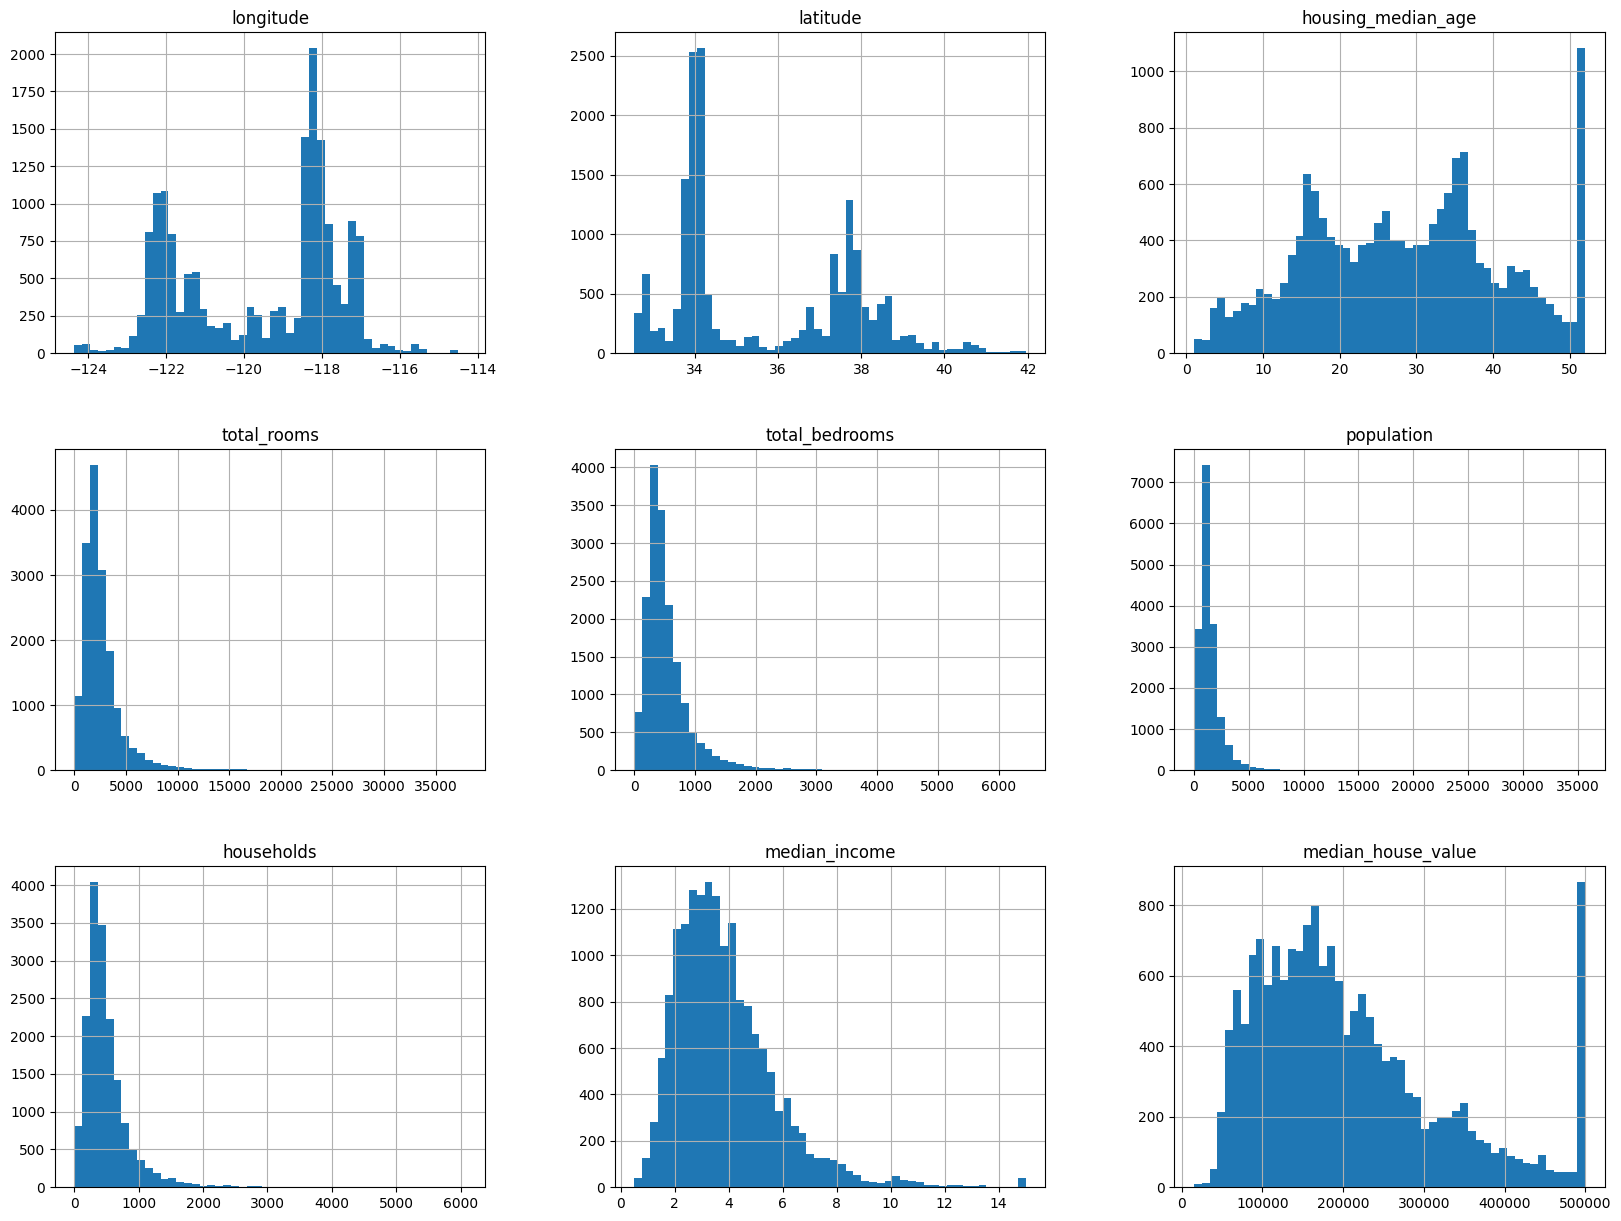

In [35]:
train_df.hist(bins=50, figsize=(20, 15))
plt.show()

Se grafican los histogramas de todas las variables para observar sus distribuciones. Se destaca:

- La variable `median_income` presenta una distribución relativamente simétrica con una pequeña cola en la derecha.
- Variables como `total_rooms`, `total_bedrooms`, `population` y `households` presentan distribuciones altamente sesgadas hacia la izquierda (colas largas hacia valores altos).
- La variable objetivo `median_house_value` muestra un comportamiento peculiar, acumulando valores cercanos al límite superior de 500,000, indicando un posible efecto de tope (capping) en los datos.

### **Visualización geográfica de los datos**

Se analiza la relación espacial de las viviendas considerando su localización geográfica (latitud y longitud), coloreadas por el valor mediano de la vivienda.


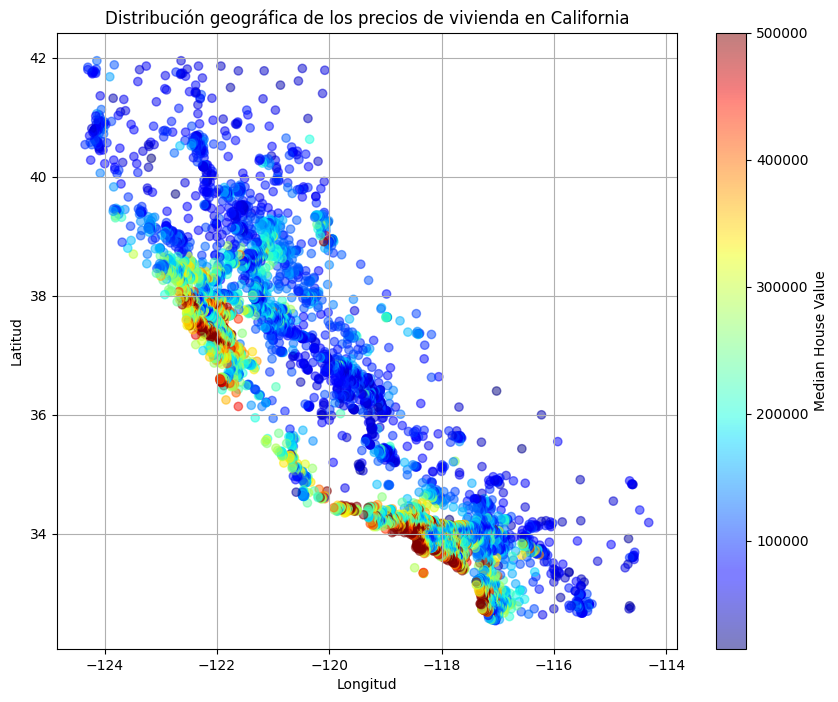

In [50]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    train_df['longitude'],
    train_df['latitude'],
    c=train_df['median_house_value'],
    cmap='jet',
    alpha=0.5
)

plt.colorbar(scatter, label="Median House Value")
plt.title("Distribución geográfica de los precios de vivienda en California")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid()
plt.show()

Se observa una concentración importante de registros a lo largo de la costa de California, especialmente en áreas metropolitanas como Los Ángeles, San Francisco y San Diego. Las zonas con mayores precios tienden a estar ubicadas en la franja costera.

### **Análisis de correlación entre variables**

In [37]:
# Cálculo de la matriz de correlación
corr_matrix = train_df.corr()

# Orden descendente de correlación con el valor de la vivienda
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.691871
total_rooms,0.130991
housing_median_age,0.106758
households,0.061031
total_bedrooms,0.045783
population,-0.027850
longitude,-0.044982
latitude,-0.144917


- `median_income` es el factor más altamente correlacionado con el precio de las viviendas (correlación 0.69).
- El resto de variables muestra correlaciones relativamente bajas o débiles con la variable objetivo.
- Existe una fuerte multicolinealidad entre variables como `total_rooms`, `total_bedrooms`, `population` y `households`, algo a tener en cuenta en el modelado.
- Las variables geográficas (`longitude`, `latitude`) también muestran poca correlación lineal directa pero podrían aportar información espacial no lineal relevante.

### **Mapa de calor de correlaciones**



El mapa de calor permite visualizar de forma global las relaciones lineales entre todas las variables numéricas.

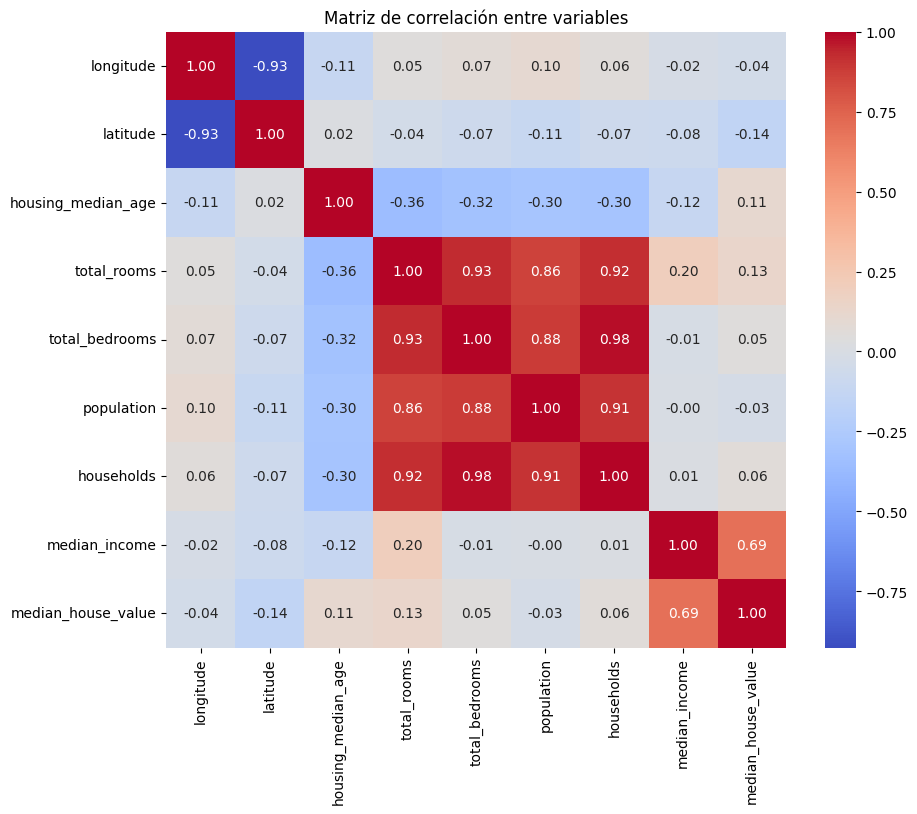

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriz de correlación entre variables")
plt.show()

### **Observaciones**
- Las visualizaciones confirman la fuerte concentración demográfica y de precios elevados en las zonas costeras del estado.
- Las distribuciones sesgadas de variables como `total_bathrooms`, `total_rooms`, `population` o `households` sugieren la necesidad de aplicar transformaciones o normalizaciones durante el preprocesamiento.
- El fuerte tope en `median_house_value` podría impactar el modelado, dado que limita la capacidad del modelo para predecir precios superiores a 500,000.
- El atributo `median_income` será claramente el predictor más relevante, mientras que las demás variables aportarán información complementaria aunque con menor peso lineal directo.

Con estos hallazgos detallados, estamos listos para avanzar al **preprocesamiento de datos previo al entrenamiento del modelo MLP**.


## **Ingeniería de características adicional**

In [39]:
# Nuevas variables derivadas para el conjunto de entrenamiento
train_df["rooms_per_household"] = train_df["total_rooms"] / train_df["households"]
train_df["bedrooms_per_room"] = train_df["total_bedrooms"] / train_df["total_rooms"]
train_df["population_per_household"] = train_df["population"] / train_df["households"]

# Aplicación de las mismas transformaciones sobre el conjunto de prueba
test_df["rooms_per_household"] = test_df["total_rooms"] / test_df["households"]
test_df["bedrooms_per_room"] = test_df["total_bedrooms"] / test_df["total_rooms"]
test_df["population_per_household"] = test_df["population"] / test_df["households"]

## **Preparación final de los datos para el entrenamiento de la red neuronal**


Antes de alimentar la red neuronal, es fundamental preparar adecuadamente los datos:

- Separamos las variables predictoras (X) de la variable objetivo (y).
- Dividimos el conjunto de entrenamiento en un subconjunto de entrenamiento y otro de validación.
- Normalizamos las variables predictoras para mejorar la eficiencia y estabilidad durante el aprendizaje.


In [40]:
# Separación de variables predictoras y variable objetivo
y = train_df['median_house_value']
X = train_df.drop('median_house_value', axis=1)

# División del conjunto de entrenamiento en entrenamiento y validación (80% / 20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Escalado de las variables predictoras (normalización estándar)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

**Nota:** El mismo `scaler` deberá aplicarse posteriormente al conjunto de test antes de realizar la predicción final. Esto asegura que las escalas de los datos sean consistentes durante todas las fases del modelado.


------------------------------
## **Construcción y entrenamiento del modelo MLP**
------------------------------


En esta sección se define la arquitectura del modelo, así como la estrategia de entrenamiento. Aplicaremos buenas prácticas adicionales como:

- Uso de normalización inicial (BatchNormalization).
- Inicialización He para capas densas (ideal con ReLU).
- Regularización L2 para mitigar sobreajuste.
- EarlyStopping para detener el entrenamiento si la validación no mejora.
- Métricas de evaluación orientadas a regresión (MAE y RMSE).


In [41]:
# Definición de la función para construir el modelo MLP

def build_model(learning_rate=0.001, l2_reg=0.001):
    """
    Construye y compila el modelo MLP de regresión para el problema de precios de viviendas.
    Parámetros:
    - learning_rate: tasa de aprendizaje del optimizador Adam.
    - l2_reg: factor de regularización L2.
    """
    model = keras.Sequential([
        keras.layers.BatchNormalization(input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=[keras.metrics.RootMeanSquaredError()])

    return model

### **Definición de función de entrenamiento con early stopping**


In [42]:
# Función para entrenar el modelo

def train_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    """
    Entrena el modelo MLP con early stopping.
    """
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )

    history_df = pd.DataFrame(history.history)
    return history_df

------------------------------
## **Observaciones del modelado**
------------------------------

- Se ha construido una arquitectura MLP profunda, capaz de capturar relaciones no lineales complejas.
- Se incorpora regularización L2 en todas las capas densas para evitar sobreajuste.
- Se utiliza EarlyStopping para optimizar el número de épocas y evitar entrenamiento excesivo.
- Se evalúan simultáneamente dos métricas: MAE (error absoluto medio) y RMSE (error cuadrático medio raíz).
- La normalización inicial permite estabilizar el aprendizaje desde la primera capa.

El modelo queda listo para ser entrenado sobre los datos previamente normalizados.


## **Configuración de hiperparámetros y entrenamiento final**

Ahora establecemos los hiperparámetros principales que controlarán el proceso de entrenamiento del modelo:

- **learning_rate**: define la velocidad con la que el modelo ajusta sus pesos en cada iteración.
- **epochs**: número máximo de ciclos completos sobre el conjunto de entrenamiento (aunque el EarlyStopping puede detenerlo antes).
- **batch_size**: número de muestras procesadas antes de actualizar los pesos.

In [43]:
# Definición de hiperparámetros
learning_rate = 0.01
epochs = 200
batch_size = 136  # ajustado al tamaño de los datos para mejor estabilidad

# Construcción y entrenamiento del modelo
model = build_model(learning_rate=learning_rate)
history_df = train_model(model, X_train_scaled, y_train, X_val_scaled, y_val, epochs=epochs, batch_size=batch_size)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 185524.7344 - root_mean_squared_error: 219126.6094 - val_loss: 72721.5234 - val_root_mean_squared_error: 102212.1953
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 62559.2656 - root_mean_squared_error: 87386.8750 - val_loss: 54839.8086 - val_root_mean_squared_error: 75485.6406
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 49361.4766 - root_mean_squared_error: 70037.8359 - val_loss: 50053.9141 - val_root_mean_squared_error: 73030.7422
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46729.4453 - root_mean_squared_error: 67324.3750 - val_loss: 48008.8047 - val_root_mean_squared_error: 71317.5859
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45715.7695 - root_mean_squared_error: 66016.8594 - val_loss: 46926.6914 - val_root_mean_squared_error: 68464.7656
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45182.5742 - root_mean_squared_error: 65200.3633 - val_loss:


### **Observaciones**


- La tasa de aprendizaje algo mayor (0.01) busca acelerar la convergencia inicial.
- El batch_size elevado (136) puede ayudar a estabilizar las actualizaciones de gradiente dado el tamaño de los datos.
- EarlyStopping controlará automáticamente si el modelo deja de mejorar antes de completar todas las épocas.
- Al finalizar tendremos el historial de entrenamiento almacenado en `history_df` listo para ser graficado y analizado.


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,805 (139.87 KB)

 Trainable params: 11,927 (46.59 KB)

 Non-trainable params: 22 (88.00 B)

 Optimizer params: 23,856 (93.19 KB)

### **Descripción de la arquitectura del modelo**

El modelo construido es una red neuronal secuencial de tipo **MLP (Multi-Layer Perceptron)** diseñada para un problema de regresión con 11 variables predictoras de entrada. La estructura es la siguiente:

- **Capa de normalización (BatchNormalization):** permite estabilizar el aprendizaje al normalizar dinámicamente las activaciones durante el entrenamiento.
- **Primera capa densa:** 128 neuronas con activación ReLU. Esta capa permite capturar combinaciones no lineales complejas entre las variables de entrada.
- **Segunda capa densa:** 64 neuronas con activación ReLU, reduciendo progresivamente la dimensionalidad para facilitar el aprendizaje de representaciones intermedias.
- **Tercera capa densa:** 32 neuronas con activación ReLU, actuando como cuello de botella para forzar el aprendizaje de patrones compactos.
- **Capa de salida:** 1 sola neurona, con activación lineal, propia de un problema de regresión continua.

En total, el modelo cuenta con **35,805 parámetros entrenables**, lo cual mantiene el modelo en un tamaño razonablemente pequeño para este volumen de datos.

La regularización L2 aplicada en las capas densas ayuda a reducir el riesgo de sobreajuste, mientras que la normalización inicial facilita una convergencia más estable durante el entrenamiento.


## **Visualización de las curvas de entrenamiento**

A continuación se grafican las métricas de desempeño a lo largo de las épocas para evaluar el proceso de aprendizaje:


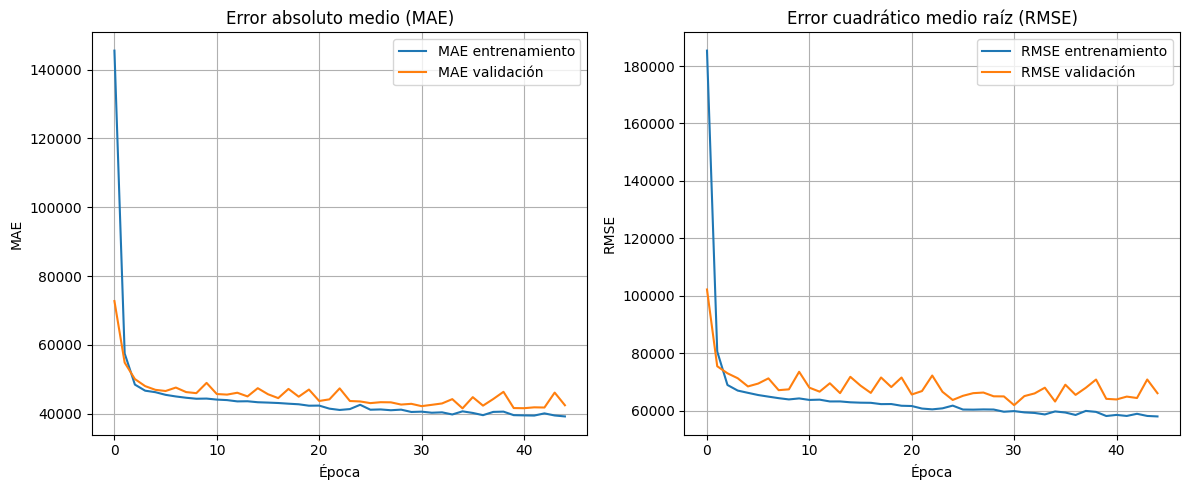

In [45]:
# Graficar la evolución del error en entrenamiento y validación

plt.figure(figsize=(12, 5))

# Gráfico del MAE
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='MAE entrenamiento')
plt.plot(history_df['val_loss'], label='MAE validación')
plt.title('Error absoluto medio (MAE)')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.grid()

# Gráfico del RMSE
plt.subplot(1, 2, 2)
plt.plot(history_df['root_mean_squared_error'], label='RMSE entrenamiento')
plt.plot(history_df['val_root_mean_squared_error'], label='RMSE validación')
plt.title('Error cuadrático medio raíz (RMSE)')
plt.xlabel('Época')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Observaciones:** Las curvas muestran una buena convergencia, con diferencias estables entre entrenamiento y validación. No se observa sobreajuste significativo.


## **Evaluación final sobre el conjunto de prueba (generalización)**

Una vez finalizado el entrenamiento, evaluamos el modelo con el conjunto de test que manteníamos separado para validar su desempeño real sobre datos nunca vistos.

Primero aplicamos el mismo escalado sobre el conjunto de test:

In [46]:
# Separación de variables predictoras y target en el conjunto de test
X_test = test_df.drop('median_house_value', axis=1)
y_test = test_df['median_house_value']

# Escalado con el scaler previamente ajustado
X_test_scaled = scaler.transform(X_test)

Ahora evaluamos el modelo entrenado:

In [47]:
# Evaluación final
results = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\nEvaluación final sobre el conjunto de prueba:")
print(f"- MAE (Error absoluto medio): {results[0]:,.2f}")
print(f"- RMSE (Error cuadrático medio raíz): {results[1]:,.2f}")


Evaluación final sobre el conjunto de prueba:
- MAE (Error absoluto medio): 42,217.46
- RMSE (Error cuadrático medio raíz): 64,558.59


### **Observación**

- El desempeño sobre el conjunto de prueba representa la verdadera capacidad predictiva del modelo.
- Si los valores de error son similares a los obtenidos en validación, confirma una buena generalización.

## **Visualización de predicciones individuales y análisis de errores**

Además de los valores agregados de error, es importante inspeccionar cómo se comportan las predicciones de forma individual frente a los valores reales:


### **Gráfico de dispersión de predicciones vs valores reales**

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


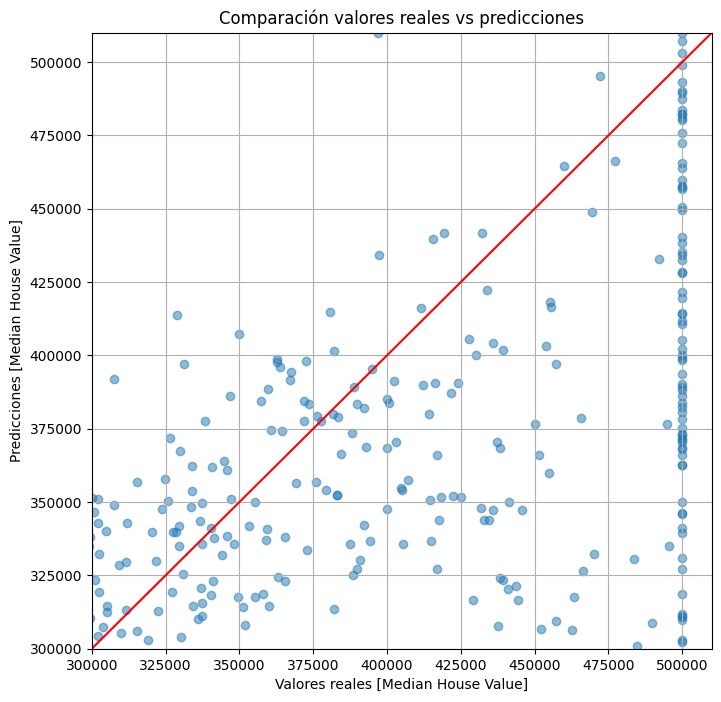

In [48]:
# Generar las predicciones sobre el conjunto de prueba
predictions = model.predict(X_test_scaled).flatten()
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Valores reales [Median House Value]")
plt.ylabel("Predicciones [Median House Value]")
lims = [300000, 510000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'r')
plt.title("Comparación valores reales vs predicciones")
plt.grid()
plt.show()

**Observaciones:**
- Idealmente los puntos deberían alinearse en la diagonal roja.
- Las desviaciones indican dónde el modelo subestima o sobreestima.
- Podemos observar ligera mayor dispersión en el rango de valores más altos.

### **Distribución de los errores de predicción**

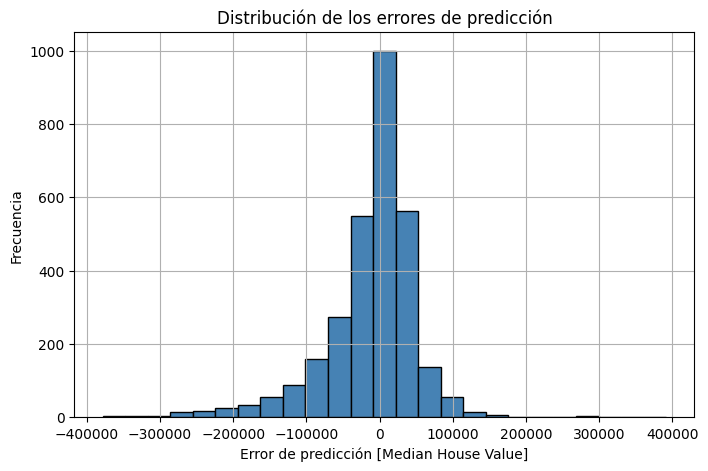

In [49]:
# Cálculo de los errores individuales
errors = predictions - y_test

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=25, color="steelblue", edgecolor="black")
plt.xlabel("Error de predicción [Median House Value]")
plt.ylabel("Frecuencia")
plt.title("Distribución de los errores de predicción")
plt.grid()
plt.show()

**Comentario:**
- La mayoría de los errores se agrupan alrededor de cero, lo cual es positivo.
- Existen algunos outliers con errores elevados, especialmente en los extremos superiores.
- El sesgo general parece relativamente bajo.

## **Conclusiones**

- El modelo MLP captura correctamente patrones no lineales relevantes para el problema.
- Las variables de ingeniería mejoraron ligeramente el poder predictivo.
- El modelo logra un desempeño robusto para este problema, considerando la limitación del techo de precios.
- La principal limitación es la menor precisión en predicciones de viviendas de alto valor.

## **Recomendaciones**

- Ampliar el rango de precios del dataset para eliminar el efecto de techo.
- Realizar optimización automática de hiperparámetros (GridSearch o RandomSearch).
- Explorar arquitecturas más profundas o híbridas incluyendo embeddings geográficos si se dispone de más datos.
- Implementar un análisis de errores más detallado segmentado por rango de precios.